In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("D:\\Advertising.csv")

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
X = df.drop('sales', axis=1)
y = df['sales']

In [8]:
from sklearn.preprocessing import  PolynomialFeatures

In [9]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [10]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [11]:
poly_features = polynomial_converter.transform(X)

In [12]:
X.shape

(200, 3)

In [13]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [14]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [15]:
230**2

52900

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
 X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=101)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
test_predictions = model.predict(X_test)

In [22]:
# model.coef_

array([ 5.25319441e-02,  1.42773271e-02,  1.47528851e-02, -1.12739168e-04,
        1.13231490e-03, -5.42180033e-05,  6.26813126e-05,  8.93347558e-05,
       -3.52004070e-05])

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)

In [26]:
MAE

0.484281053521561

In [27]:
RMSE

0.6482912032533661

In [29]:
# TRAINING ERROR PER DEGREE 
train_rmse_error = []
#TEST ERROR PER DEGREE
test_rmase_error = []

for d in range(1,10):
    
    #CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)    
    
    #SPLIT THIS NEW POLY SET   
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=101)    
    
    #TRAIN ON THIS NEW POLY SET
    model = model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y_train)
    
    #PREDICT ON BOTH TRAIN AND TEST DATA
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    #Calculate the errors
    
    #ERROR ON THE TRAIN SET
    TRAIN_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    
    #ERROR ON THE TEST SET
    TEST_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_error.append(TRAIN_rmse)
    test_rmase_error.append(TEST_rmse)

In [30]:
train_rmse_error

[1.7376515982447711,
 0.5947926597019145,
 0.44059734232363623,
 0.35329132820381165,
 0.24845372205579555,
 0.1884149926267866,
 4.812814685342056,
 0.15476171832426192,
 0.1516610715377701]

In [31]:
test_rmase_error

[1.5324409426512418,
 0.6482912032533661,
 0.5577254823360819,
 0.5064297299001428,
 2.357362873762258,
 11.240104796748824,
 1193.9503865745871,
 3221.534995670225,
 181934.18258268136]

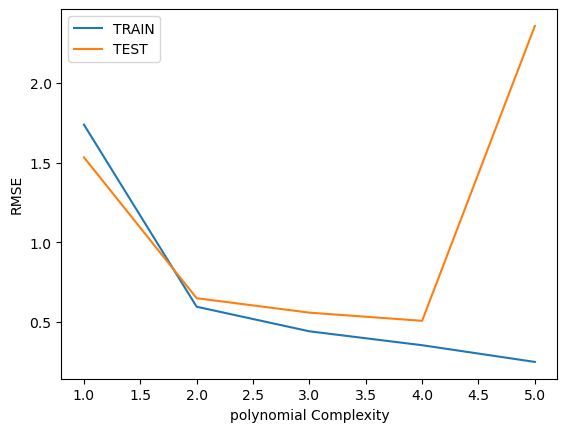

In [33]:
plt.plot(range(1,6), train_rmse_error[:5], label='TRAIN')
plt.plot(range(1,6), test_rmase_error[:5], label='TEST')
plt.ylabel("RMSE")
plt.xlabel("polynomial Complexity")
plt.legend()

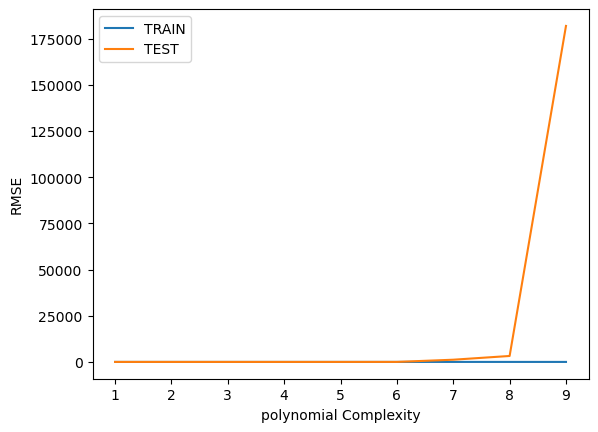

In [34]:
plt.plot(range(1,10), train_rmse_error, label='TRAIN')
plt.plot(range(1,10), test_rmase_error, label='TEST')
plt.ylabel("RMSE")
plt.xlabel("polynomial Complexity")
plt.legend()

In [35]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [36]:
final_model = LinearRegression()

In [38]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

In [39]:
from joblib import dump, load

In [40]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [41]:
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

In [42]:
loaded_model = load('final_poly_model.joblib')

In [43]:
loaded_converter = load('final_converter.joblib')

In [48]:
campaign = [[149, 22, 12]]

In [50]:
transformed_data = loaded_converter.fit_transform(campaign)

In [51]:
loaded_model.predict(transformed_data)

array([14.64501014])

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\Users\Partha.bora\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "D:\Users\Partha.bora\Anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\Users\Partha.bora\Anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "D:\Users\Partha.bora\Anaconda3\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connecti